In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글폰트 지정
plt.rc('font',family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [6]:
df = pd.read_csv('/content/train.csv')

In [7]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [14]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [16]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


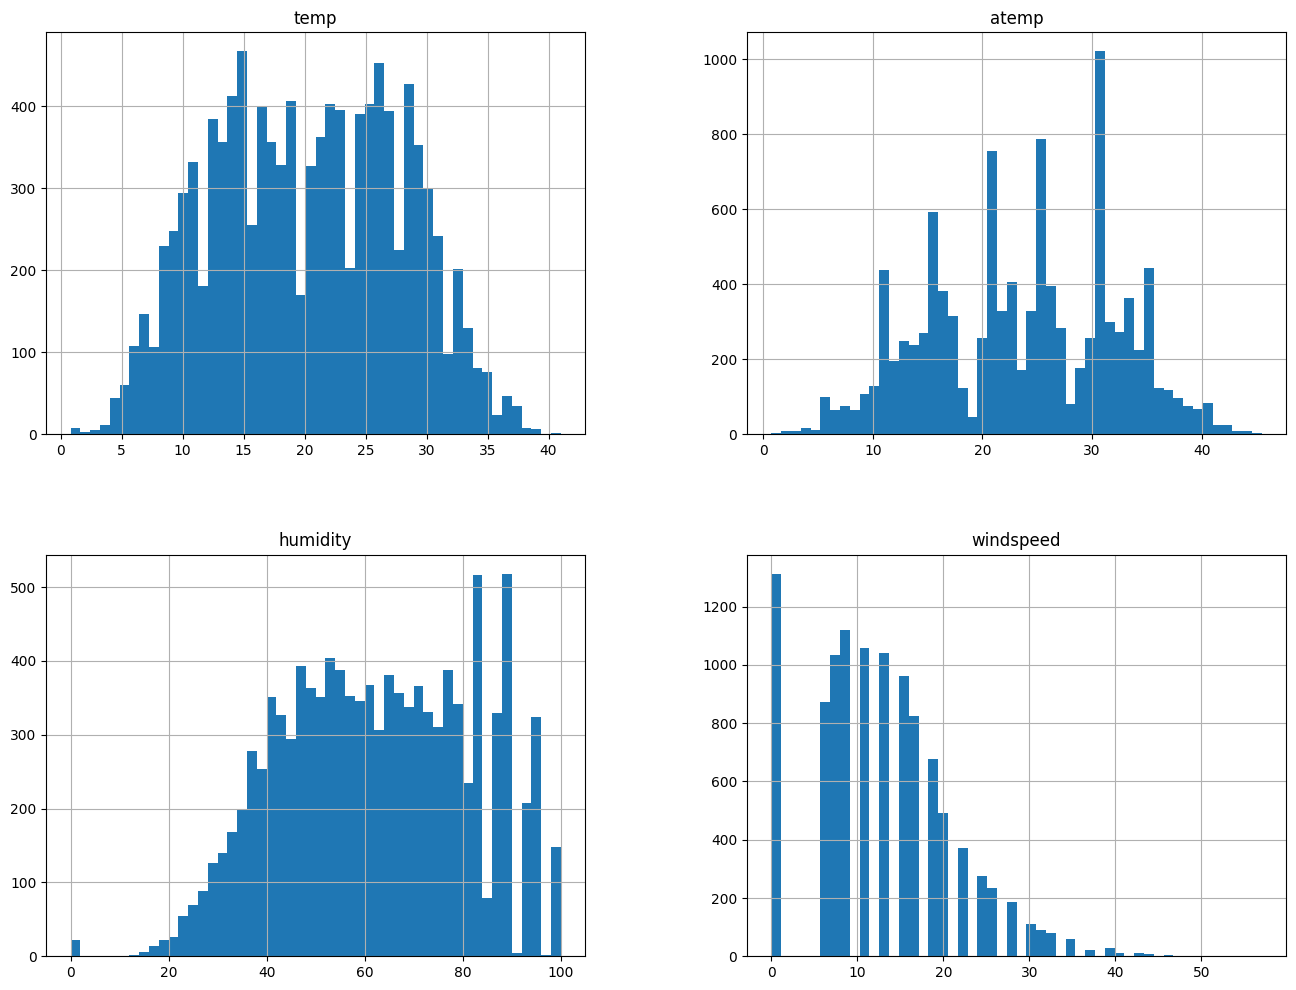

In [31]:
import warnings
warnings.filterwarnings(action='ignore')

fig, ax = plt.subplots(figsize=(16,12))

df[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)

plt.show()


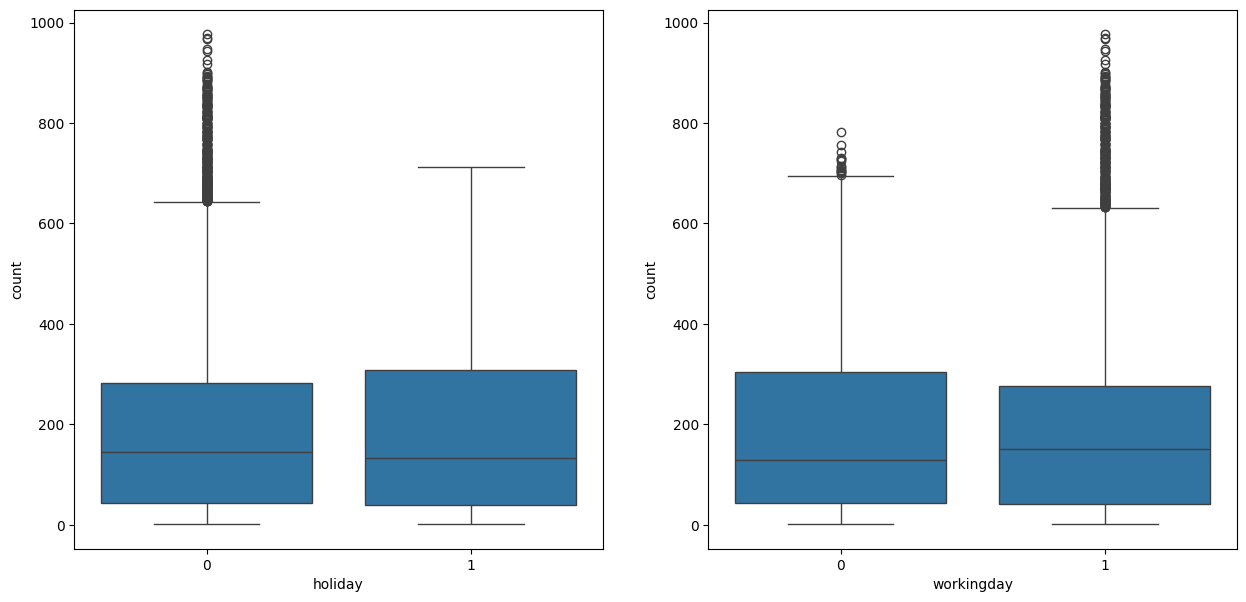

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

sns.boxplot(data=df, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=df, x='workingday', y='count', ax=ax[1])

plt.show()

<ipython-input-26-f11af718b05c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
<ipython-input-26-f11af718b05c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])


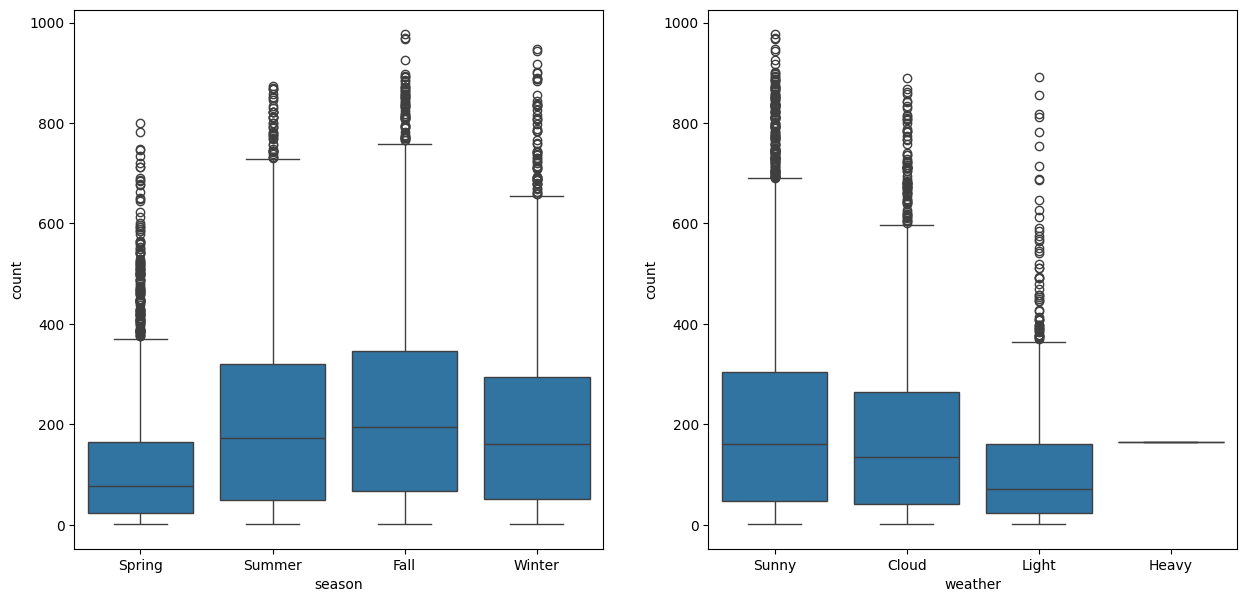

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# season 와 weather 의 boxplot
sns.boxplot(data=df, x='season', y='count', ax=ax[0])
sns.boxplot(data=df, x='weather', y='count', ax=ax[1])

ax[0].set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])

plt.show()

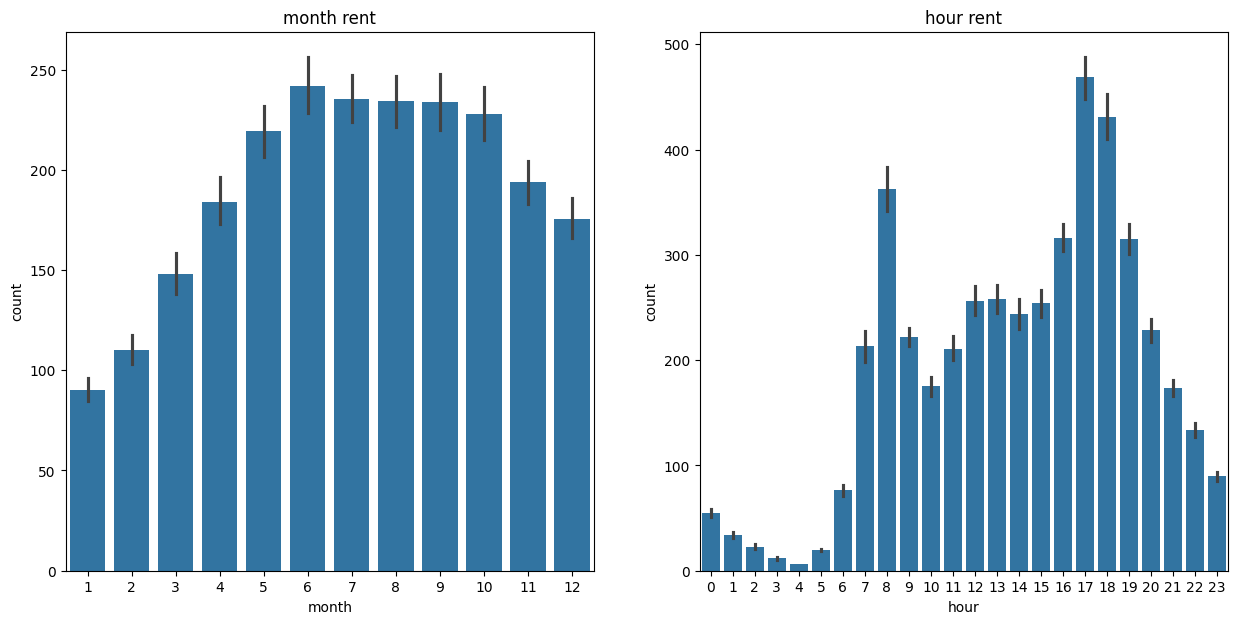

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

sns.barplot(data=df, x='month', y= 'count', ax=ax[0])
sns.barplot(data=df, x='hour', y= 'count', ax=ax[1])

ax[0].set(title='month rent')
ax[1].set(title='hour rent')

plt.show()

In [37]:
df.drop(['datetime', 'day', 'year'], inplace=True, axis=1)

In [38]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22


In [41]:
df['casual'].describe()

,casual
count,10886.000000
mean,36.021955
std,49.960477
min,0.000000
25%,4.000000
50%,17.000000
75%,49.000000
max,367.000000


In [42]:
df['registered'].describe()

,registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


In [43]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'month',
       'hour'],
      dtype='object')

In [52]:
df[df['holiday'] == 1].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
count,311.000000,311.0,311.0,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2.697749,1.0,0.0,1.392283,20.244244,23.397395,62.102894,13.199711,48.781350,137.096463,185.877814,6.556270,11.527331
std,1.135339,0.0,0.0,0.579604,8.760250,9.598185,17.566712,8.458933,61.478009,122.715027,168.300531,3.732493,6.927625
min,1.000000,1.0,0.0,1.000000,4.100000,6.060000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.0,0.0,1.000000,13.120000,14.395000,46.000000,7.001500,5.000000,30.000000,38.500000,4.000000,6.000000
50%,3.000000,1.0,0.0,1.000000,20.500000,24.240000,62.000000,12.998000,20.000000,104.000000,133.000000,7.000000,12.000000
75%,4.000000,1.0,0.0,2.000000,27.880000,31.820000,76.000000,19.001200,70.500000,207.000000,308.000000,10.000000,17.500000
max,4.000000,1.0,0.0,3.000000,37.720000,42.425000,94.000000,39.000700,242.000000,601.000000,712.000000,11.000000,23.000000


In [53]:
df[df['holiday'] == 0].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
count,10575.000000,10575.0,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000,10575.000000
mean,2.500993,0.0,0.700898,1.419196,20.230466,23.662662,61.880095,12.787623,35.646714,156.094941,191.741655,6.520473,11.542033
std,1.115164,0.0,0.457886,0.635372,7.761737,8.439687,19.292905,8.155835,49.535115,151.762822,181.513131,3.435720,6.915819
min,1.000000,0.0,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.0,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,43.000000,4.000000,6.000000
50%,2.000000,0.0,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,119.000000,145.000000,6.000000,12.000000
75%,3.000000,0.0,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,223.000000,283.000000,9.000000,18.000000
max,4.000000,0.0,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,23.000000


In [59]:
df['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [61]:
df[df['windspeed']>=12].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
count,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000
mean,2.394718,0.029872,0.693260,1.419126,20.345260,23.524194,56.564299,19.153648,40.906557,170.181056,211.087614,6.166849,12.455373
std,1.119206,0.170251,0.461182,0.646274,7.818005,8.836248,19.121372,5.947885,52.766436,153.792418,185.469483,3.447051,6.402620
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,12.998000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,15.910000,42.000000,15.001300,5.000000,53.000000,62.000000,3.000000,8.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,54.000000,16.997900,21.000000,135.000000,168.000000,6.000000,13.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,70.000000,22.002800,57.000000,241.000000,308.000000,9.000000,18.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,44.695000,100.000000,56.996900,355.000000,886.000000,977.000000,12.000000,23.000000


In [62]:
df[df['windspeed']<12].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
count,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000
mean,2.620460,0.027242,0.668273,1.417717,20.114466,23.788254,67.301334,6.334450,31.052261,140.668458,171.720719,6.882320,10.611935
std,1.101579,0.162804,0.470877,0.620990,7.763616,8.088726,17.807768,3.950776,46.414008,146.709704,174.426030,3.404252,7.285460
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,54.000000,6.003200,3.000000,24.000000,28.750000,4.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,69.000000,7.001500,12.000000,100.000000,121.000000,7.000000,9.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,82.000000,8.998100,40.000000,204.000000,258.250000,10.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,11.001400,367.000000,833.000000,970.000000,12.000000,23.000000
